<a href="https://colab.research.google.com/github/OlgaZy/Python_for_DA/blob/main/HW_15_2_%D0%9F%D0%B5%D1%80%D0%B5%D0%B2%D1%96%D1%80%D0%BA%D0%B0_%D1%81%D1%82%D0%B0%D1%82%D0%B8c%D1%82%D0%B8%D1%87%D0%BD%D0%B8%D1%85_%D0%B3%D1%96%D0%BF%D0%BE%D1%82%D0%B5%D0%B7_Z_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Перевірка статиcтичних гіпотез. Z-test.



0. Зчитайте дані з `data.csv` у змінну data, яка має тип pandas.DataFrame. Ми будемо далі працювати з цією змінною.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Налаштування для візуалізації
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.size'] = 12

In [12]:
data = pd.read_csv('/content/drive/MyDrive/DA_in_IT/Data/data.csv')
data

,Unnamed: 0,data
0,0,17.499453
1,1,19.662399
2,2,7.182823
3,3,29.841625
4,4,9.239386
...,...,...
95,95,26.244944
96,96,22.282832
97,97,18.697188
98,98,27.041189


Запустіть код нижче. Для коректної робити всіх подальших методів дані мають бути у вигляді одновимірного `numpy.ndarray` вектора та мати розмірність (100,). Така розмірність означає, що дані - одновимірні (колонка), якщо б розмірність була (100, 1), то дані сприймаються методами як двовимірні (таблиця), хоча для нас виглядати можуть так само.

In [13]:
data = data.data.values
data.shape

(100,)

In [14]:
data.size

100

**Завдання 1**. Зчитані дані - це сума покупок в доларах наших покупців на сайті протягом липня 2025 року.

До цього місяця, ми мали продажі в середньому на чек $20.

Необхідно зʼясувати, чи вийшло у нас статистично значущо **підвищити** середній чек за липень 2025?

Аби дати відповідь - ми проведемо z-test на рівні значущості $\alpha=0.05$ двома способами. В цьому завданні ми будемо виконувати обчислення "вручну" з використанням бібліотек numpy та scipy.stats подібно до прикладу в лекції. Для цього виконайте наступні 7 кроків. Правильне виконання кожного з кроків оцінюється в 1 бал.

1. Запишіть параметри задачі у змінні Python:
    - `sample_mean` - $\bar{x}$, середнє значення в вибірці
    - `population_mean` - $\mu_0$, середнє значення в популяції (тобто те, з яким ми порівнюємо середнє вибіркове значення)
    - `population_std` - $\sigma$, вибіркове стандартне відхилення, яке ми вважаємо, що є рівним ст. відх. популяції, адже маємо достатньо велику вибірку.
    - `sample_size` - $n$, розмір вибірки
    - `alpha` - $\alpha$ рівень значущості
    
    **Увага!** Для обчислення стандартного відхилення маємо скористатись функцією `np.std(your_dataframe, ddof=1)`. Чому так - розбираємо в лекції про t-test.


2. Визначте для цієї задачі:
    - якою є гіпотеза $H_0$
    - якою є альтернативна гіпотеза $H_a$
    - з яким типом тесту ми маємо справу - лівосторонній, правосторонній чи двосторонній.

3. Обчисліть стандартну помилку SE.
4. Розрахуйте z-статистику.
5. Знайдіть критичне z-значення з допомогою бібліотеки stats.
6. Обчисліть p-value з допомогою бібліотеки stats.
7. Прийміть рішення, чи відхиляєте ви гіпотезу $H_0$. Для прийняття рішення зробіть і порівняння z-статистики з критичним значенням, і проаналізуйте p-value.

## Частина 1: Розрахунок вручну

**Крок 1: Визначаємо параметри задачі**

In [23]:
# 1. Задаємо всі відомі параметри
sample_mean = round(np.mean(data), 2)      # x̄ - середнє у вибірці
print(sample_mean)
population_mean = 20    # μ₀ - середнє в популяції (те, з чим порівнюємо)
print(population_mean)
population_std = np.std(data, ddof=1)      # σ - стандартне відхилення в популяції
print(population_std)
sample_size = data.size         # n - розмір вибірки
print(sample_size)
alpha = 0.05            # α - рівень значущості (ймовірність помилки I роду)
print(alpha)

19.38
20
6.25356123240434
100
0.05


**Крок 2: Формулюємо гіпотези**

  H₀: μ = 20 (продажі в середньому на чек $20)

  H₁: μ > 20 (продажі в липні в середньому стали більше середнього чеку)

Тип тесту: правосторонній (one-tailed)

**Крок 3: Обчислюємо стандартну помилку**

In [27]:
# Формула: SE = σ / √n
standard_error = population_std / np.sqrt(sample_size)

print("=" * 60)
print("ОБЧИСЛЕННЯ СТАНДАРТНОЇ ПОМИЛКИ:")
print("=" * 60)
print("Формула: SE = σ / √n")
print(f"SE = {population_std} / √{sample_size}")
print(f"SE = {population_std} / {np.sqrt(sample_size):.3f}")
print(f"SE = {standard_error:.3f}")
print()
print("Інтерпретація: В середньому, вибіркове середнє відхиляється")
print(f"від справжнього середнього на ±{standard_error:.3f}")

ОБЧИСЛЕННЯ СТАНДАРТНОЇ ПОМИЛКИ:
Формула: SE = σ / √n
SE = 6.25356123240434 / √100
SE = 6.25356123240434 / 10.000
SE = 0.625

Інтерпретація: В середньому, вибіркове середнє відхиляється
від справжнього середнього на ±0.625


**Крок 4: Розраховуємо z-статистику**

In [29]:
# Формула: z = (x̄ - μ₀) / SE
z_statistic = (sample_mean - population_mean) / standard_error

print("=" * 60)
print("РОЗРАХУНОК Z-СТАТИСТИКИ:")
print("=" * 60)
print("Формула: z = (x̄ - μ₀) / SE")
print(f"z = ({sample_mean} - {population_mean}) / {standard_error:.3f}")
print(f"z = {sample_mean - population_mean} / {standard_error:.3f}")
print(f"z = {z_statistic:.3f}")
print()
print("Інтерпретація:")
print(f"Наше вибіркове середнє відхиляється на {z_statistic:.3f} стандартних")
print("помилок від гіпотетичного середнього популяції.")
print()
# if z_statistic > 0.99:
#     print("Це досить велике відхилення. (більше 2 стандартних помилок)")
# elif z_statistic > 1:
#     print("Це помірне відхилення (між 1 та 2 стандартними помилками)")
# else:
#     print("Це невелике відхилення (менше 1 стандартної помилки)")

РОЗРАХУНОК Z-СТАТИСТИКИ:
Формула: z = (x̄ - μ₀) / SE
z = (19.38 - 20) / 0.625
z = -0.620000000000001 / 0.625
z = -0.991

Інтерпретація:
Наше вибіркове середнє відхиляється на -0.991 стандартних
помилок від гіпотетичного середнього популяції.



**Крок 5: Знаходимо критичне значення**

In [30]:
# Для правостороннього тесту з α = 0.05
z_critical = stats.norm.ppf(1 - alpha)

print("=" * 60)
print("КРИТИЧНЕ ЗНАЧЕННЯ:")
print("=" * 60)
print(f"Для рівня значущості α = {alpha} (правосторонній тест)")
print(f"Критичне z-значення = {z_critical:.3f}")
print()
print("Що це означає?")
print(f"Якщо z-статистика > {z_critical:.3f}, то результат настільки")
print("незвичайний, що ми не віримо у випадковість за гіпотезою Н0.")
print(f"Ймовірність отримати z > {z_critical:.3f} випадково = {alpha*100}%")

КРИТИЧНЕ ЗНАЧЕННЯ:
Для рівня значущості α = 0.05 (правосторонній тест)
Критичне z-значення = 1.645

Що це означає?
Якщо z-статистика > 1.645, то результат настільки
незвичайний, що ми не віримо у випадковість за гіпотезою Н0.
Ймовірність отримати z > 1.645 випадково = 5.0%


**Крок 6: Обчислюємо p-value**

In [32]:
# Для правостороннього тесту: p-value = P(Z > z_statistic)
p_value = 1 - stats.norm.cdf(z_statistic)

print("=" * 60)
print("P-VALUE:")
print("=" * 60)
print(f"p-value = {p_value:.6f}")
print()
print("Що це означає?")
print(f"Якщо H₀ правильна, то ймовірність")
print(f"випадково отримати середній чек за липень ≥ {sample_mean} становить {p_value:.6f}")
print(f"або приблизно {p_value*100:.4f}%")
print()
if p_value < 0.001:
    print("Це НАДЗВИЧАЙНО малоймовірно! (менше 0.1%)")
elif p_value < 0.01:
    print("Це дуже малоймовірно! (менше 1%)")
elif p_value < 0.05:
    print("Це малоймовірно! (менше 5%)")
else:
    print("Це цілком можливо випадково")

P-VALUE:
p-value = 0.839263

Що це означає?
Якщо H₀ правильна, то ймовірність
випадково отримати середній чек за липень ≥ 19.38 становить 0.839263
або приблизно 83.9263%

Це цілком можливо випадково


**Крок 7: Приймаємо рішення**

**Метод 1: Порівняння z-статистики з критичним значенням**

In [33]:
print("=" * 60)
print("МЕТОД 1: Порівняння z-статистики з критичним значенням")
print("=" * 60)
print(f"z-статистика = {z_statistic:.3f}")
print(f"Критичне значення = {z_critical:.3f}")
print(f"Порівняння: {z_statistic:.3f} {'>' if z_statistic > z_critical else '≤'} {z_critical:.3f}")

if z_statistic > z_critical:
    print("Висновок: z-статистика ПЕРЕВИЩУЄ критичне значення")
    decision1 = "ВІДХИЛЯЄМО H₀"
else:
    print("Висновок: z-статистика НЕ перевищує критичне значення")
    decision1 = "НЕ ВІДХИЛЯЄМО H₀"

print(f"Рішення: {decision1}")

МЕТОД 1: Порівняння z-статистики з критичним значенням
z-статистика = -0.991
Критичне значення = 1.645
Порівняння: -0.991 ≤ 1.645
Висновок: z-статистика НЕ перевищує критичне значення
Рішення: НЕ ВІДХИЛЯЄМО H₀


**Метод 2: Порівняння p-value з рівнем значущості** (ЧАСТІШЕ ВИКОРИСТОВУЄТЬСЯ)

In [37]:
print("\n" + "=" * 60)
print("МЕТОД 2: Порівняння p-value з рівнем значущості")
print("=" * 60)
print("⚠️ Цей метод використовується ЧАСТІШЕ, оскільки p-value")
print("   дає точну ймовірність і не залежить від типу тесту")
print()
print(f"p-value = {p_value:.6f}")
print(f"Рівень значущості α = {alpha}")
print(f"Порівняння: {p_value:.6f} {'<' if p_value < alpha else '≥'} {alpha}")

if p_value < alpha:
    print("Висновок: p-value МЕНШЕ за рівень значущості")
    decision2 = "ВІДХИЛЯЄМО H₀"
else:
    print("Висновок: p-value НЕ менше за рівень значущості")
    decision2 = "НЕ ВІДХИЛЯЄМО H₀"

print(f"Рішення: {decision2}")


МЕТОД 2: Порівняння p-value з рівнем значущості
⚠️ Цей метод використовується ЧАСТІШЕ, оскільки p-value
   дає точну ймовірність і не залежить від типу тесту

p-value = 0.839263
Рівень значущості α = 0.05
Порівняння: 0.839263 ≥ 0.05
Висновок: p-value НЕ менше за рівень значущості
Рішення: НЕ ВІДХИЛЯЄМО H₀


**Графічне представлення тесту**

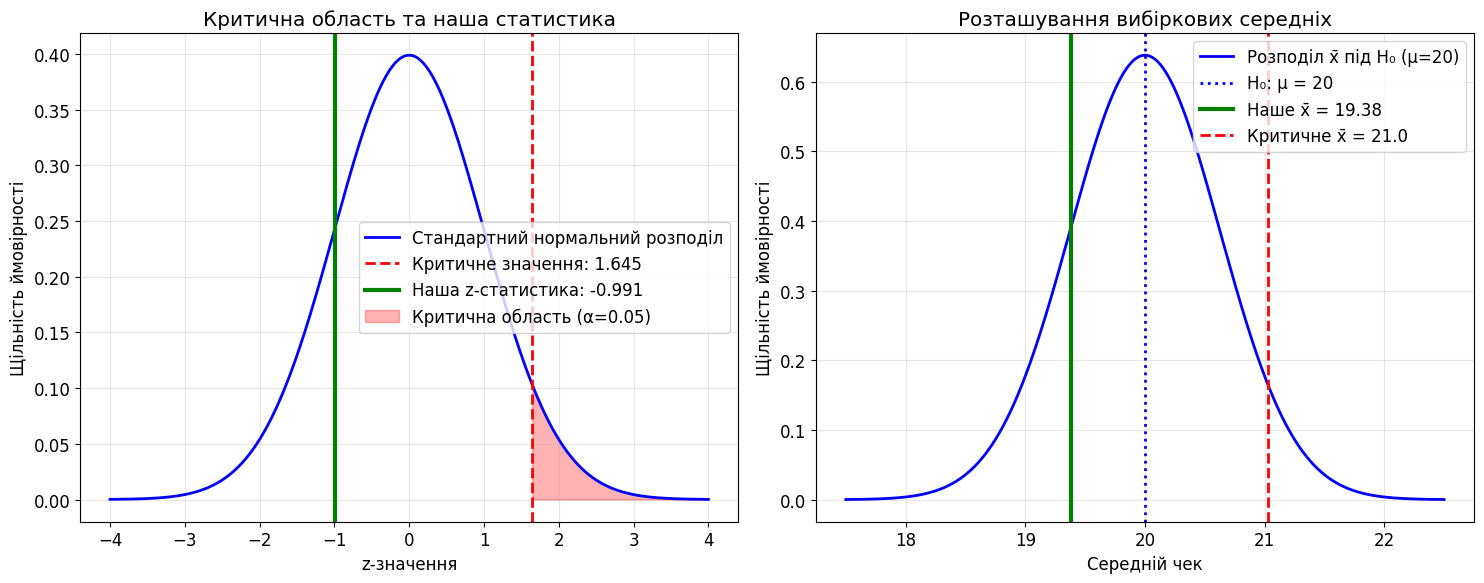

In [57]:
# Створюємо детальну візуалізацію
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Підготовка даних для графіків
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, 0, 1)

# Графік 1: Критична область
ax1 = axes[0]
ax1.plot(x, y, 'b-', linewidth=2, label='Стандартний нормальний розподіл')
ax1.axvline(z_critical, color='red', linestyle='--', linewidth=2,
            label=f'Критичне значення: {z_critical:.3f}')
ax1.axvline(z_statistic, color='green', linestyle='-', linewidth=3,
            label=f'Наша z-статистика: {z_statistic:.3f}')

# Заливаємо критичну область
x_crit = x[x >= z_critical]
y_crit = stats.norm.pdf(x_crit, 0, 1)
ax1.fill_between(x_crit, y_crit, alpha=0.3, color='red',
                  label=f'Критична область (α={alpha})')

ax1.set_xlabel('z-значення')
ax1.set_ylabel('Щільність ймовірності')
ax1.set_title('Критична область та наша статистика')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Графік 2: P-value
ax2 = axes[1]
x_means = np.linspace(population_mean - 4*standard_error,
                      population_mean + 4*standard_error, 1000)
y_means = stats.norm.pdf(x_means, population_mean, standard_error)
ax2.plot(x_means, y_means, 'b-', linewidth=2,
         label=f'Розподіл x̄ під H₀ (μ={population_mean})')
ax2.axvline(population_mean, color='blue', linestyle=':', linewidth=2,
            label=f'H₀: μ = {population_mean}')
ax2.axvline(sample_mean, color='green', linestyle='-', linewidth=3,
            label=f'Наше x̄ = {sample_mean}')

# Критичне значення в термінах IQ
critical_iq = population_mean + z_critical * standard_error
ax2.axvline(critical_iq, color='red', linestyle='--', linewidth=2,
            label=f'Критичне x̄ = {critical_iq:.1f}')

ax2.set_xlabel('Середній чек')
ax2.set_ylabel('Щільність ймовірності')
ax2.set_title('Розташування вибіркових середніх')
ax2.legend()
ax2.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

# Частина 2: Використання бібліотеки statsmodels

**Завдання 2.** Виконайте обчислення z-test з використанням бібліотеки statsmodels.

Отримайте z-статистику та р-значення.

Виведіть p-значення та зробіть висновок, чи ми маємо достатньо доказів, аби стверджувати, що середній чек зріс.

Чи зійшлись значення z-статистику та р-значення в цьому завданні з попередніми обчисленнями?

Завдання оцінюється в 3 бали.

In [58]:
from statsmodels.stats import weightstats as stests

print("=" * 60)
print("ВИКОРИСТАННЯ STATSMODELS ДЛЯ Z-ТЕСТУ:")
print("=" * 60)
print(data)
print("=" * 60)

sample_mean = round(np.mean(data), 2)      # x̄ - середнє у вибірці
print(sample_mean)
population_mean = 20    # μ₀ - середнє в популяції (те, з чим порівнюємо)
print(population_mean)
population_std = np.std(data, ddof=1)      # σ - стандартне відхилення в популяції
print(population_std)
sample_size = data.size         # n - розмір вибірки
print(sample_size)
alpha = 0.05            # α - рівень значущості (ймовірність помилки I роду)
print(alpha)

ВИКОРИСТАННЯ STATSMODELS ДЛЯ Z-ТЕСТУ:
[17.49945292 19.66239904  7.18282343 29.84162485  9.23938649 14.94951581
 23.0172885  12.52827148 13.65228669 14.54595431 23.30872427 33.75324808
 20.24923636 13.29244733 23.23434992 16.4230418  19.88521702 27.05000732
 15.5127743  20.05415151 14.73135264 19.06139498 21.53942271 14.06732571
 17.9670682  18.58289581 16.17406993 12.87432628 11.47269664 19.07902883
 18.38565824 33.38820073  5.39139454 20.67635903 22.22266722 28.15780318
 23.01114324 14.93471778 20.00005857 23.25411543 18.11895082 24.62607043
  8.79145607 30.387108   28.80606806 17.98593597 23.66804468 20.28782355
 15.02518827 20.52626131 26.00219532 17.71344489 17.74598346 19.55317542
 22.60097798 27.67027538 16.19192417 23.05037746 21.29669604  8.84832568
 17.48410111 19.20602661 19.76257856 21.9560206   7.75806171 20.27753314
 15.93394654 11.36336584 23.14577858 24.41167746 16.08049839 25.05473769
 17.71090111 20.39893405 13.40756632 29.50692234  4.04330326 19.45128426
 24.17071763 

In [56]:
# === СИНТАКСИС ФУНКЦІЇ ===
# stests.ztest(x1,                # масив даних для тестування
#              x2=None,            # другий масив (для двовибіркового тесту)
#              value=0,            # значення для порівняння (наше μ₀)
#              alternative='two-sided',  # тип тесту
#              usevar='pooled',    # як використовувати дисперсію - лише для двовибіркових тестів
#              ddof=1.0)           # ступені свободи

# === ПАРАМЕТР alternative ===
# 'two-sided' - двосторонній тест (H₁: μ ≠ μ₀)
# 'larger'    - правосторонній тест (H₁: μ > μ₀) - НАШ ВИПАДОК
# 'smaller'   - лівосторонній тест (H₁: μ < μ₀)

print("\n" + "=" * 60)
print("ВИКОНАННЯ Z-ТЕСТУ:")
print("=" * 60)

# Виконуємо правосторонній z-тест
z_stat_sm, p_val_sm = stests.ztest(data,           # наші дані
                                    value=population_mean,  # μ₀ = 20
                                    alternative='larger', # H₁: μ > 20
                                    ddof=1.0)

print(f"Результати z-тесту:")
print(f"  Z-статистика: {z_stat_sm:.3f}")
print(f"  P-value: {p_val_sm:.6f}")
print()

# Інтерпретація результатів
print("ІНТЕРПРЕТАЦІЯ:")
print("-" * 40)
if p_val_sm < alpha:
    print(f"✅ ВІДХИЛЯЄМО H₀")
    print(f"   p-value ({p_val_sm:.6f}) < α ({alpha})")
    print("   Висновок: У нас вийшло статистично значущо підвищити середній чек за липень 2025")
else:
    print(f"❌ НЕ ВІДХИЛЯЄМО H₀")
    print(f"   p-value ({p_val_sm:.6f}) ≥ α ({alpha})")
    print("   Висновок: Немає достатніх доказів, що вийшло статистично значущо підвищити середній чек за липень 2025")

# Порівняння з ручними розрахунками
print("\n" + "=" * 60)
print("ПОРІВНЯННЯ З РУЧНИМИ РОЗРАХУНКАМИ:")
print("=" * 60)
print(f"Z-статистика:")
print(f"  Ручний розрахунок: {z_statistic:.3f}")
print(f"  Statsmodels:       {z_stat_sm:.3f}")
print(f"  Різниця:           {abs(z_statistic - z_stat_sm):.3f}")


ВИКОНАННЯ Z-ТЕСТУ:
Результати z-тесту:
  Z-статистика: -0.995
  P-value: 0.840216

ІНТЕРПРЕТАЦІЯ:
----------------------------------------
❌ НЕ ВІДХИЛЯЄМО H₀
   p-value (0.840216) ≥ α (0.05)
   Висновок: Немає достатніх доказів, що вийшло статистично значущо підвищити середній чек за липень 2025

ПОРІВНЯННЯ З РУЧНИМИ РОЗРАХУНКАМИ:
Z-статистика:
  Ручний розрахунок: -0.991
  Statsmodels:       -0.995
  Різниця:           0.004


**Чи зійшлись значення z-статистику та р-значення в цьому завданні з попередніми обчисленнями?**

Є несуттєва різниця Z-статистики на 0.004. Статистично несуттєво, бо Z  далеко від критичних значень.

Причини:
  - є різниця яке стандартне відхилення  (ddof=0 vs ddof=1) береться для обчислень
  - різні внутрішні алгоритми обчисленнь
  - округлення на будь-якому проміжному кроці